In [1]:
import os, sys
dir1 = os.path.abspath(os.path.join(os.path.abspath(''), '..'))
if not dir1 in sys.path: sys.path.append(dir1)

from utils.environment import setup_data_vars
setup_data_vars()

In [2]:
data_path = os.path.join(os.environ.get('nnUNet_raw'), os.environ.get('Anorectum'), os.environ.get('data_trainingImages'), 'zzAMLART_049_0000.nii.gz')
assert os.path.exists(data_path), f'File not found: {data_path}'

In [3]:
import SimpleITK as sitk

img = sitk
img = sitk.ReadImage(data_path)
img = sitk.GetArrayFromImage(img)

In [4]:
# flip the image up to down
img = img[::-1]

In [5]:
slice_num = 251
img_slice = img[:, slice_num, :]

In [6]:
# upscale image to 1024x1024
import cv2

img_slice = cv2.resize(
            img_slice,
            (256, 256),
            interpolation=cv2.INTER_NEAREST
        )


In [10]:
window_1 = [35,55] # Muscle
window_2 = [300, 400] # Cancellous Bones
window_3 = [-120, -90] # Fat

In [28]:
# extract the points that are between the two window values. Preserve the value range

def window_image(img, window):
    window_min, window_max = window[0], window[1]

    img[img < window_min] = window_min
    img[img > window_max] = window_max

    return img

img_slice_1 = window_image(img_slice.copy(), window_1)
img_slice_2 = window_image(img_slice.copy(), window_2)
img_slice_3 = window_image(img_slice.copy(), window_3)

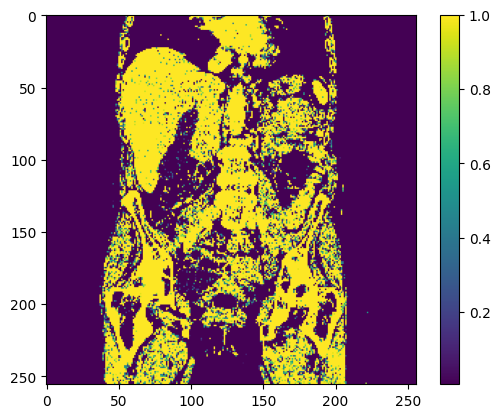

In [35]:
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt

# Normalize pixel values between 0 and 1
norm_img_slice_1 = Normalize(vmin=window_1[0], vmax=window_1[1])

# Choose a colormap
cmap = plt.cm.cividis  # Example colormap

# Apply colormap to normalized pixel values
colored_image = cmap(norm_img_slice_1(img_slice_1))

# Display the image
plt.imshow(colored_image)
plt.colorbar()  # Add a colorbar for reference
plt.show()

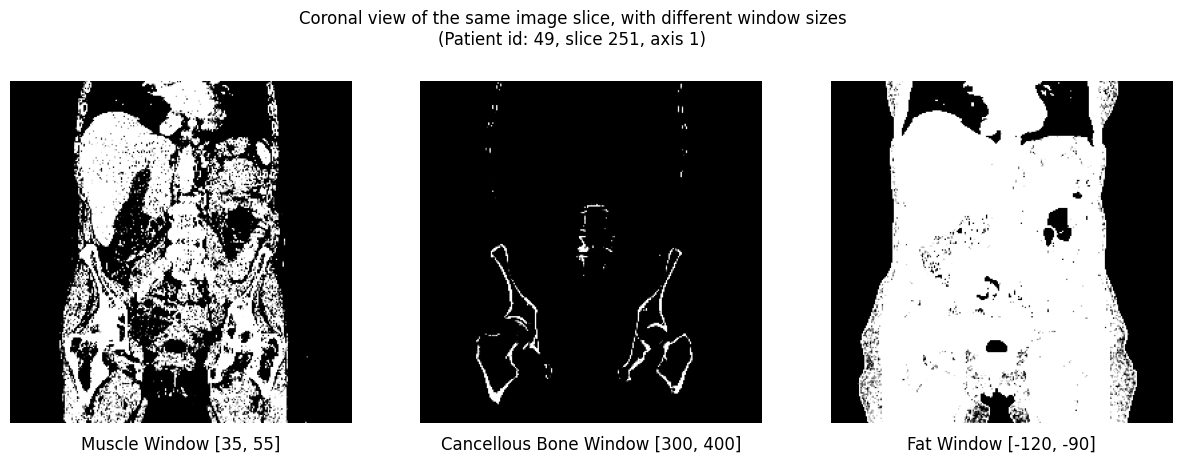

In [29]:
# view the data with different windowing

import matplotlib.pyplot as plt


fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_slice_1, cmap='gray', vmin=window_1[0], vmax=window_1[1])
axs[0].set_title(f'Muscle Window [{window_1[0]}, {window_1[1]}]', y=-0.1)
axs[0].axis('off')
axs[1].imshow(img_slice_2, cmap='gray', vmin=window_2[0], vmax=window_2[1])
axs[1].set_title(f'Cancellous Bone Window [{window_2[0]}, {window_2[1]}]', y=-0.1)
axs[1].axis('off')
axs[2].imshow(img_slice_3, cmap='gray', vmin=window_3[0], vmax=window_3[1])
axs[2].set_title(f'Fat Window [{window_3[0]}, {window_3[1]}]', y=-0.1)
axs[2].axis('off')

plt.suptitle('Coronal view of the same image slice, with different window sizes\n(Patient id: 49, slice 251, axis 1)')
plt.show()

